In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train : ",x_train.shape) # 60000 images de 28x28 pixels
print("y_train : ",y_train.shape)

x_train :  (60000, 28, 28)
y_train :  (60000,)


In [7]:
label_names = {
    0: 'T-shirt/haut',
    1: 'Pantalon',
    2: 'Pull-over',
    3: 'Robe',
    4: 'Manteau',
    5: 'Sandale',
    6: 'Chemise',
    7: 'Baskets',
    8: 'Sac',
    9: 'Bottes'
}

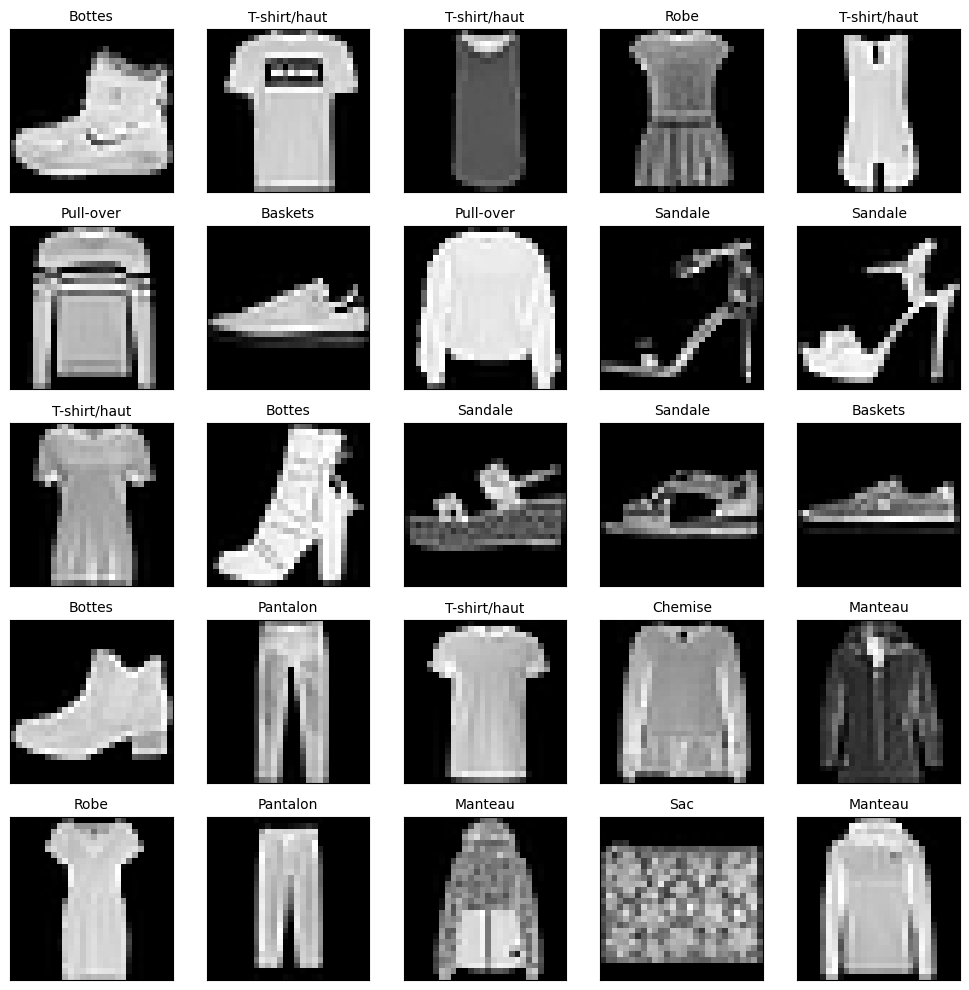

In [8]:
# Affichage des images du dataset avec le label
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(label_names[y_train[i]], color='black', fontsize=10)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


In [9]:
# Transformation des données en vecteur one-hot
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [10]:
# normalisation des données
x_train = x_train/255
x_test = x_test/255

In [11]:
print(x_train.shape)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28,1)
print(x_train.shape) # ajouter du canal de couleur graysoale

(60000, 28, 28)
(60000, 28, 28, 1)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [13]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
# Entrainer le modèle
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=1)

history = model.fit(x_train, y_cat_train, epochs=20, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/20


1875/1875 [==============================] - 27s 14ms/step - loss: 0.5627 - accuracy: 0.7969 - val_loss: 0.3651 - val_accuracy: 0.8687
Epoch 2/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3793 - accuracy: 0.8645 - val_loss: 0.3219 - val_accuracy: 0.8814
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3280 - accuracy: 0.8831 - val_loss: 0.2956 - val_accuracy: 0.8895
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2959 - accuracy: 0.8921 - val_loss: 0.2785 - val_accuracy: 0.8971
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2754 - accuracy: 0.9010 - val_loss: 0.2580 - val_accuracy: 0.9033
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2553 - accuracy: 0.9052 - val_loss: 0.2682 - val_accuracy: 0.9023


313/313 [==============================] - 1s 4ms/step - loss: 0.2682 - accuracy: 0.9023
Test Loss: 0.26816526055336
Test Accuracy: 0.9023000001907349


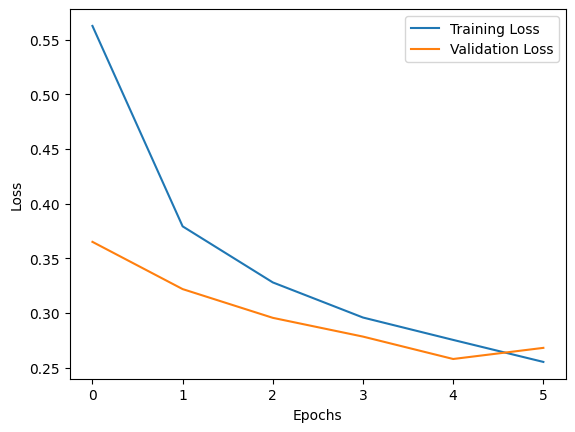

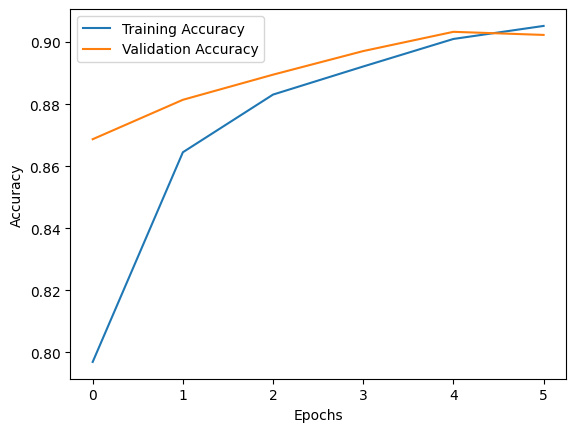

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_cat_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 [==============================] - 1s 4ms/step


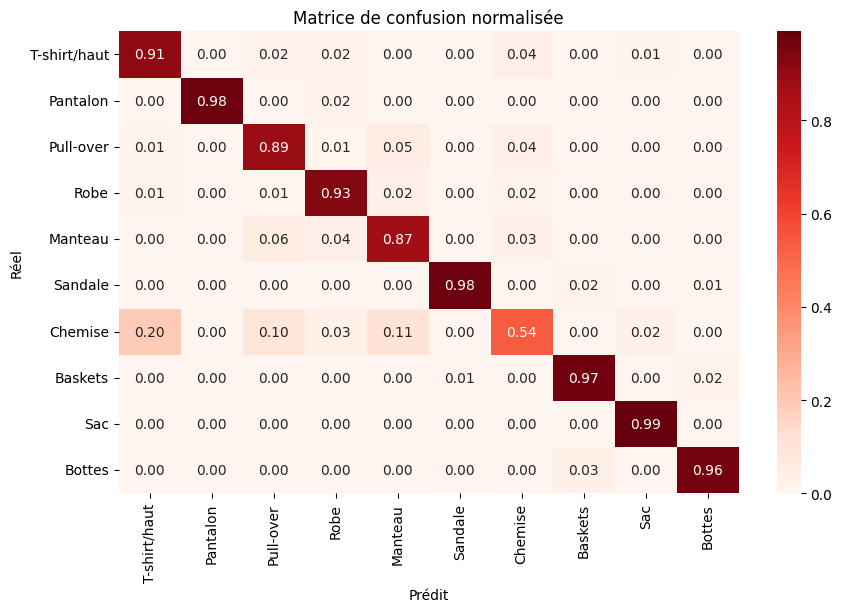

In [17]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, predicted_classes)

# Normaliser la matrice de confusion pour obtenir des pourcentages
cm_percentage = cm / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(10,6))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Reds", xticklabels=label_names.values(), yticklabels=label_names.values())
plt.title("Matrice de confusion normalisée")
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [19]:
model.save("fasion_mnist.kerras")

INFO:tensorflow:Assets written to: fasion_mnist.kerras\assets


INFO:tensorflow:Assets written to: fasion_mnist.kerras\assets


In [23]:
from tensorflow.keras.models import load_model

model = load_model("fasion_mnist.kerras")


1/1 [==============================] - 0s 25ms/step


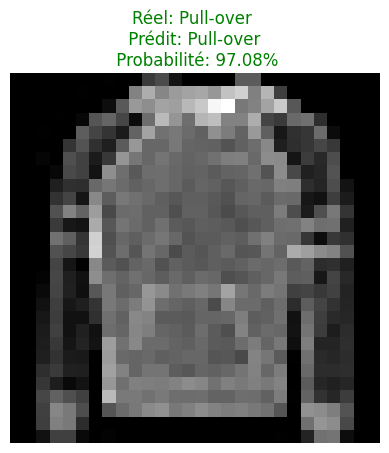

In [48]:
import random

# Sélectionnez un index aléatoire de x_train
index = random.randint(0, len(x_train)-1)
image = x_train[index]
label = y_train[index]

# Redimensionnez l'image pour correspondre à la forme d'entrée du modèle
image = image.reshape(1, 28, 28, 1)

# Faites une prédiction en utilisant le modèle entraîné
prediction = model.predict(image)
label_predite = np.argmax(prediction)

# Obtenez les noms des labels
nom_label_actuel = label_names[label]
nom_label_predite = label_names[label_predite]

# Obtenez le pourcentage de prédiction
pourcentage_prediction = np.max(prediction) * 100

# Définissez la couleur du texte en fonction de la prédiction
couleur = 'green' if label_predite == label else 'red'

# Affichez l'image avec le label prédit et le label réel
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Réel: {nom_label_actuel} \n Prédit: {nom_label_predite} \n Probabilité: {pourcentage_prediction:.2f}%', color=couleur)
plt.axis('off')
plt.show()